# Analysing Covid and Flight data for each city

In [1]:
from urllib.request import urlopen
from io import StringIO
import csv

import sys
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = urlopen("https://raw.githubusercontent.com/shantanutrip/covid_flight_analysis/master/Resultant_Data/covid_flight_count_data.csv").read().decode('ascii','ignore')
dataFile = StringIO(data)
csvReader = csv.reader(dataFile)
rows = [row for row in csvReader if row[0]!='city']

city_list = []
for row in rows:
    if row[0] not in city_list:
        city_list.append(row[0])

covid_flight_count_data = {}

In [6]:
def get_covid_and_flight_count_for(city_name):
    temp = city_name

    flight_in = []
    flight_out = []
    flight_all = []
    total_num = []
    all_dates = []
    rate_of_increase = []
    Date = []
    count = 0
    prevRow = None
    city_dict = {}
    

    for row in rows:
        if row[0] == temp:
            count += 1
            flight_in.append(int(row[4]))
            flight_out.append(int(row[5]))
            flight_all.append(int(row[4])+int(row[5]))
            total_num.append(int(row[2]))
            all_dates.append(row[1][-5:])
            if prevRow == None:
                rate_of_increase.append(0)
            else:
                rate_of_increase.append(int(row[2]) - int(prevRow[2]))
            prevRow = row
            if count%3==1:
                Date.append(row[1][-5:])
            else:
                Date.append('')
    
    city_dict['flight_in'] = flight_in
    city_dict['flight_out'] = flight_out
    city_dict['flight_all'] = flight_all
    city_dict['rate_of_increase'] = rate_of_increase
    city_dict['Date'] = Date
    city_dict['all_dates'] = all_dates
    city_dict['count'] = count
    city_dict['total_num'] = total_num
    covid_flight_count_data[city_name] = city_dict
    
    return city_dict

In [7]:
def plot_covid_and_flight_count_for(city_name):
    
    if city_name not in covid_flight_count_data:
        get_covid_and_flight_count_for(city_name)
    
    city_dict = covid_flight_count_data[city_name]
    
    temp = city_name

    flight_in = city_dict['flight_in']
    flight_out = city_dict['flight_out']
    flight_all = city_dict['flight_all']
    total_num = city_dict['total_num']
    rate_of_increase = city_dict['rate_of_increase']
    Date = city_dict['Date']
    count = city_dict['count']


    X = [i+1 for i in range(count)]

    plt.title("Data in %s" %(city_name))
    plt.xlabel("date")
    plt.ylabel("number")
    
    city_dict['flight_in'] = flight_in
    city_dict['flight_out'] = flight_out
    city_dict['flight_all'] = flight_all
    city_dict['rate_of_increase'] = rate_of_increase
    city_dict['Date'] = Date
    
    
    plt.plot(X, total_num, 'r', label='cases')
    plt.plot(X, flight_in, 'b', label='flight_in')
    plt.plot(X, flight_out, 'g', label='flight_out')
    plt.plot(X, flight_all, 'y', label='flight_all')
    plt.plot(X, rate_of_increase, 'm', label='rate_of_increase')
    plt.scatter(X, total_num, marker='o', color='black', s=10)
    plt.scatter(X, flight_in, marker='o', color='black', s=10)
    plt.scatter(X, flight_out, marker='o', color='black', s=10)
    plt.scatter(X, flight_all, marker='o', color='black', s=10)
    plt.scatter(X, rate_of_increase, marker='o', color='black', s=10)
    plt.xticks(X, Date, rotation=90)

    plt.legend()
    plt.grid(linewidth=0.3)
    plt.show()
    #plt.savefig('image_1/%s.jpg' % temp, dpi=300)

    plt.close()

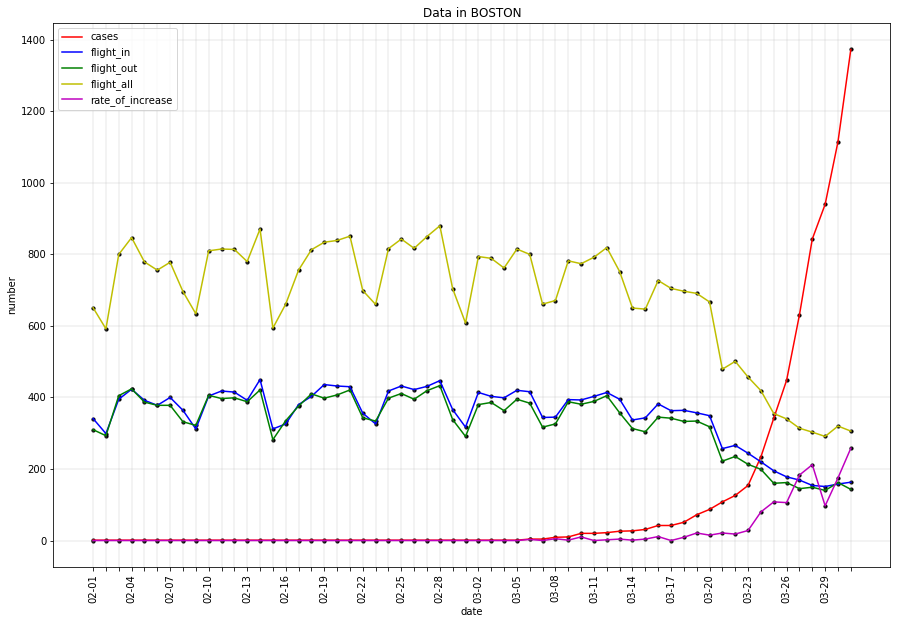

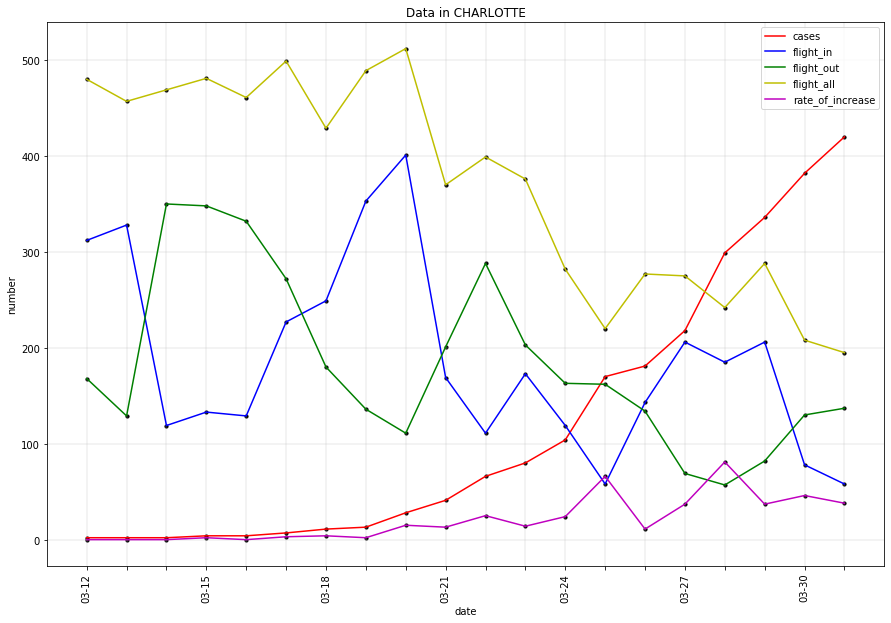

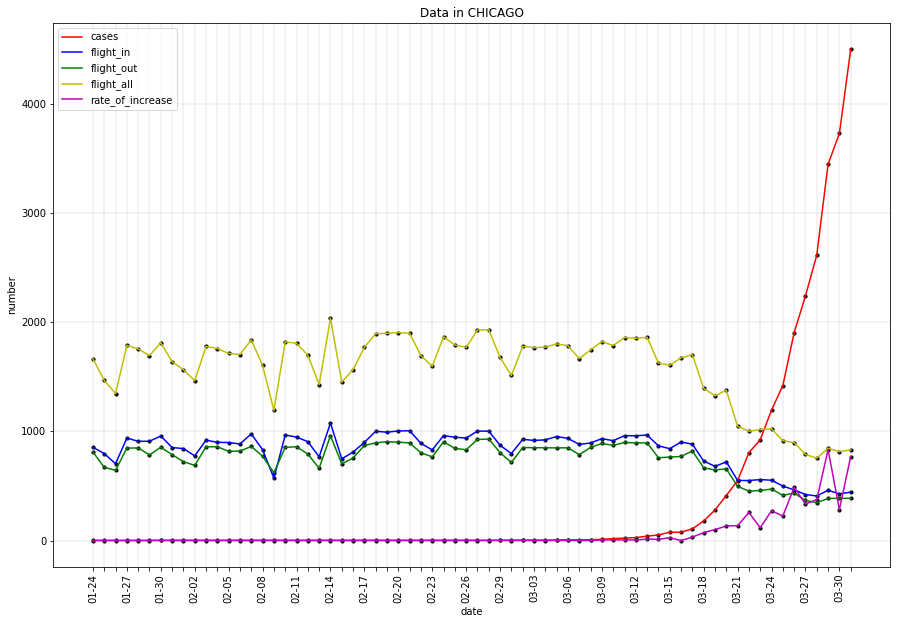

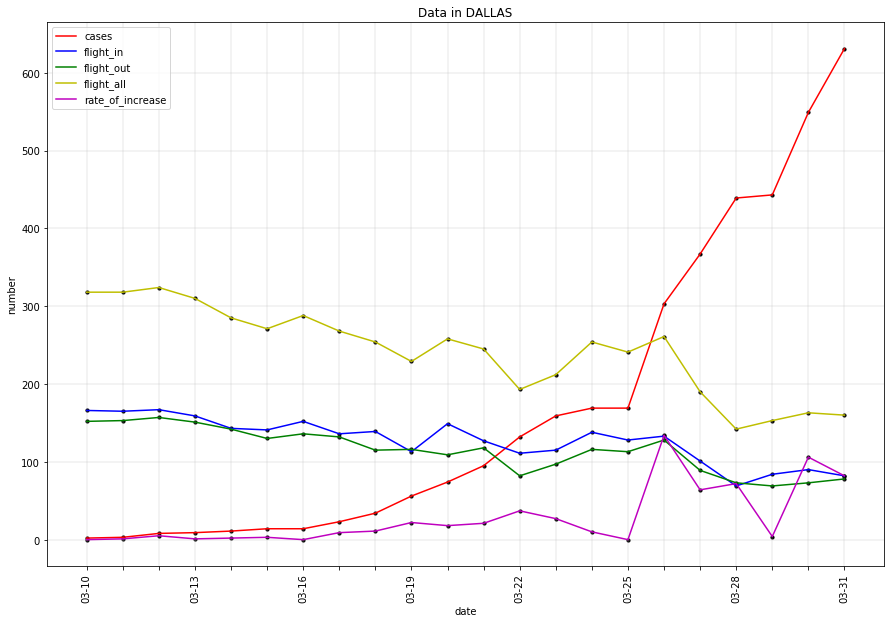

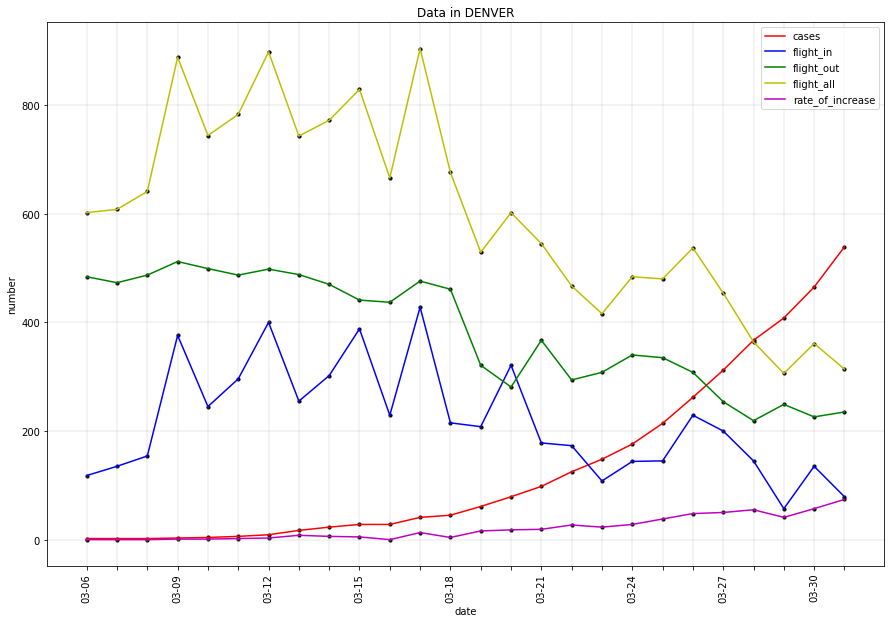

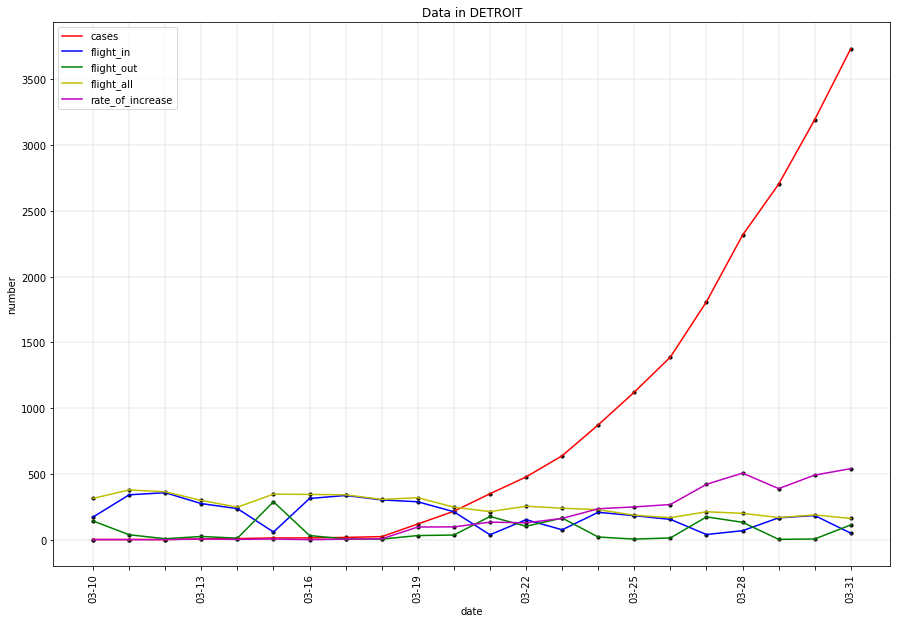

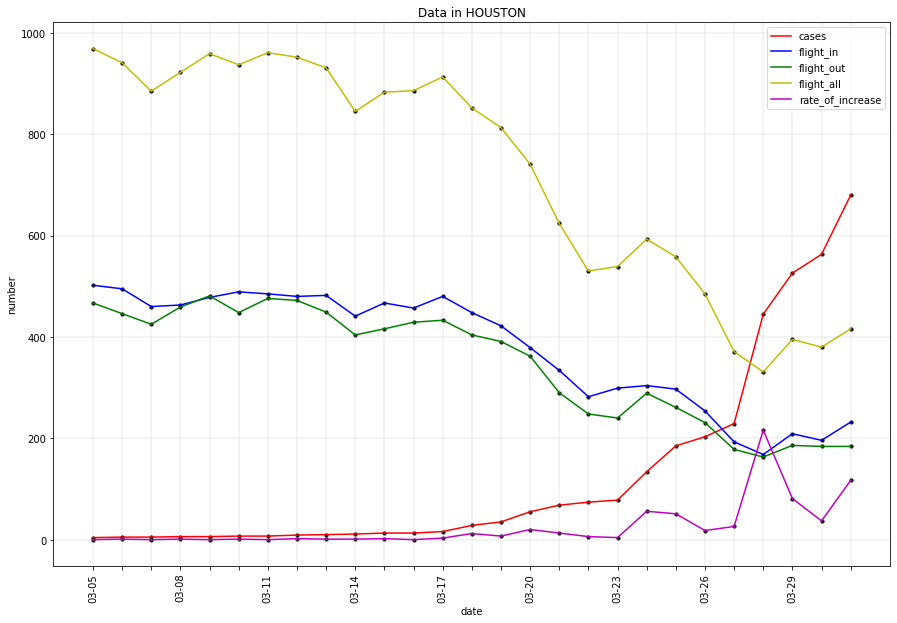

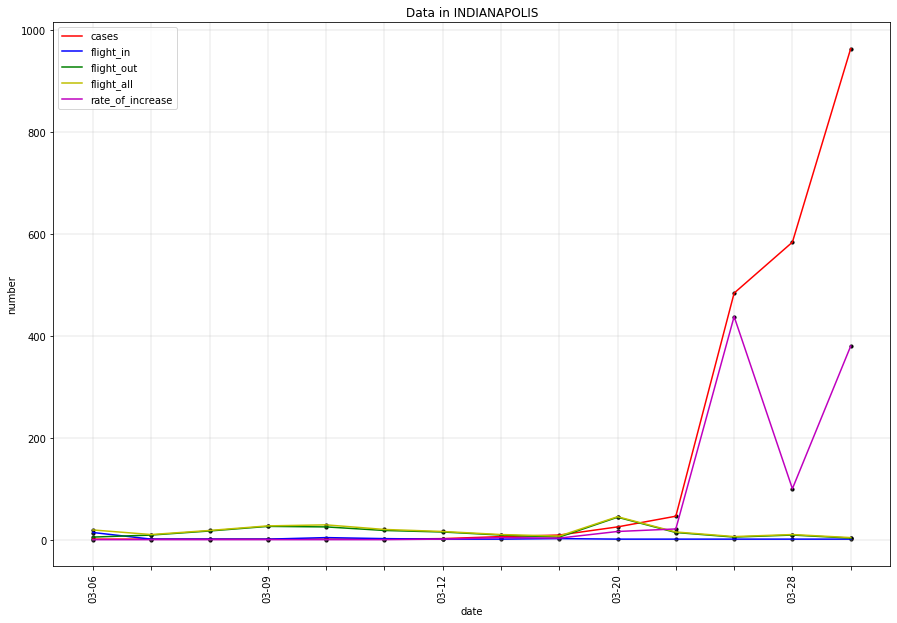

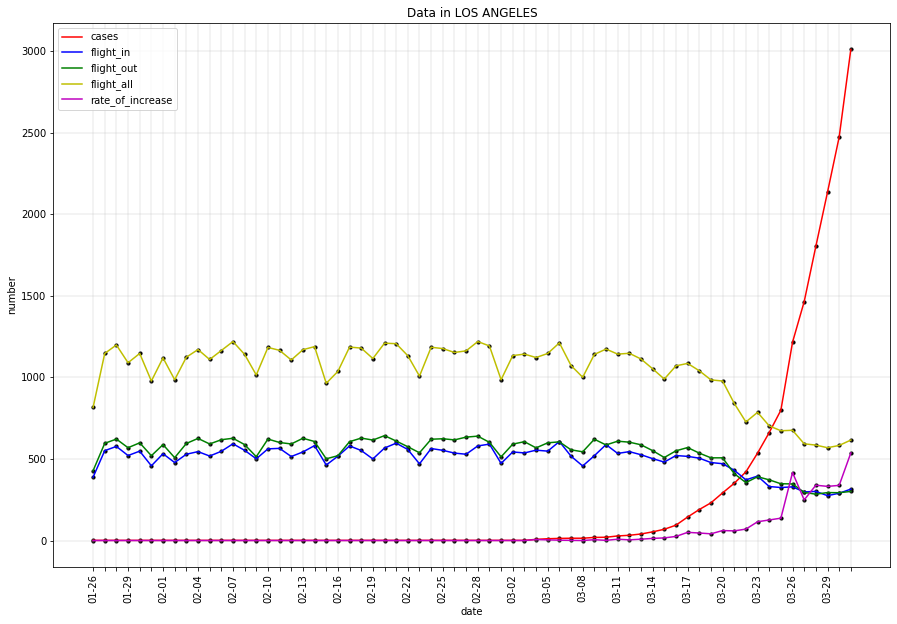

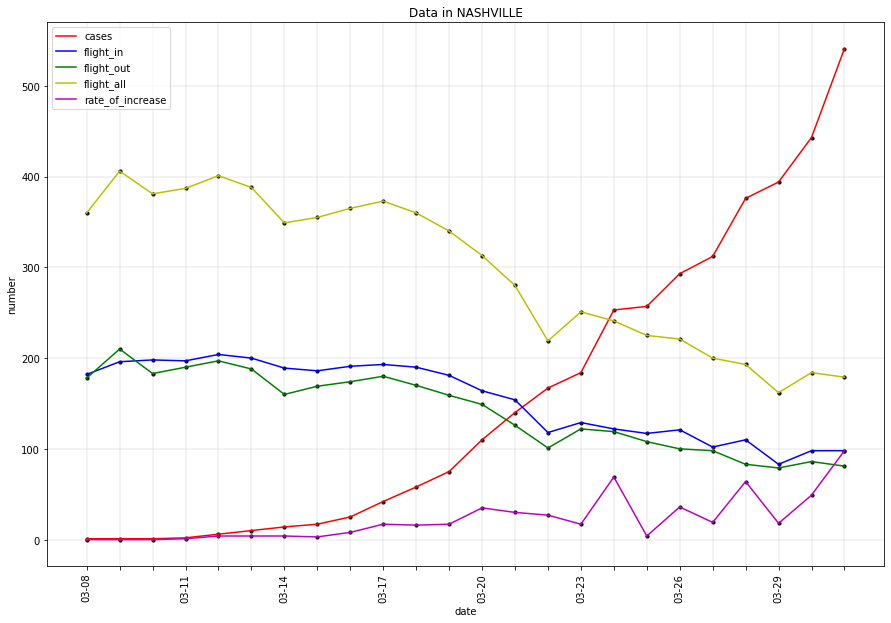

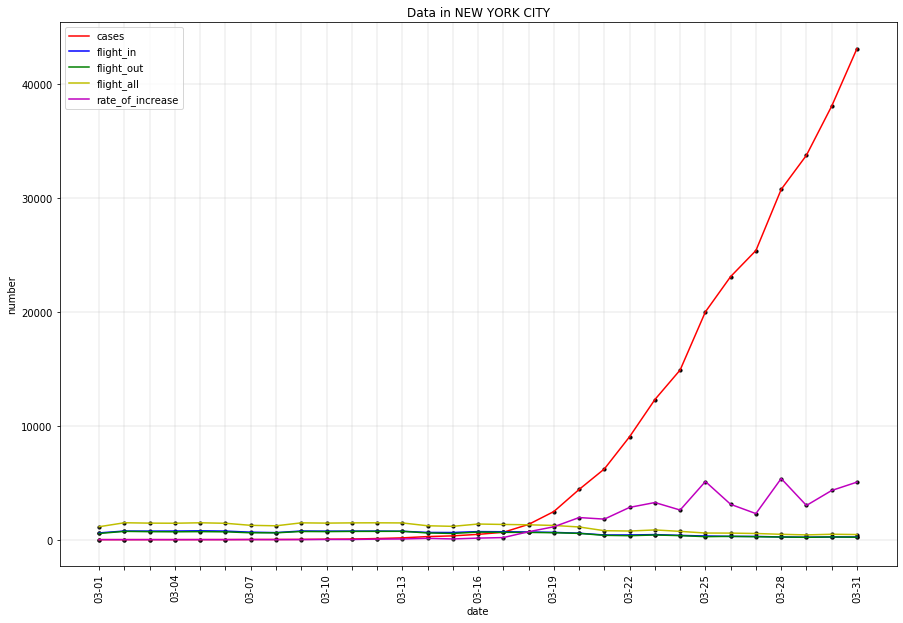

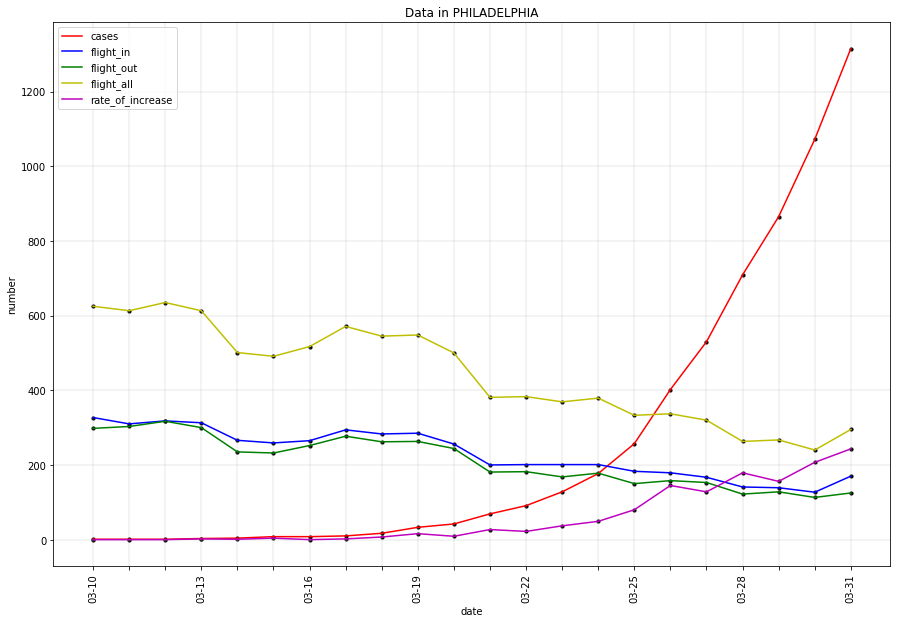

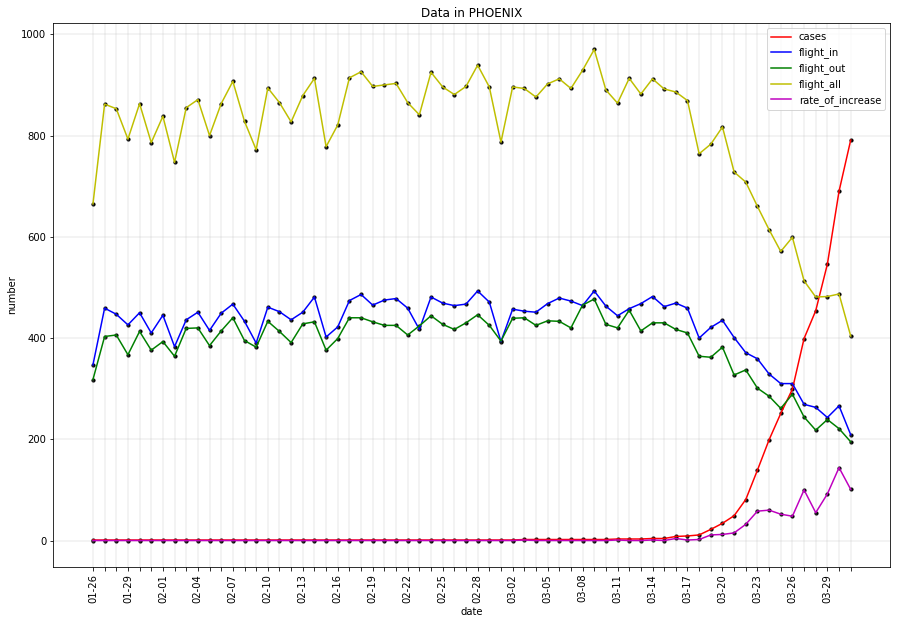

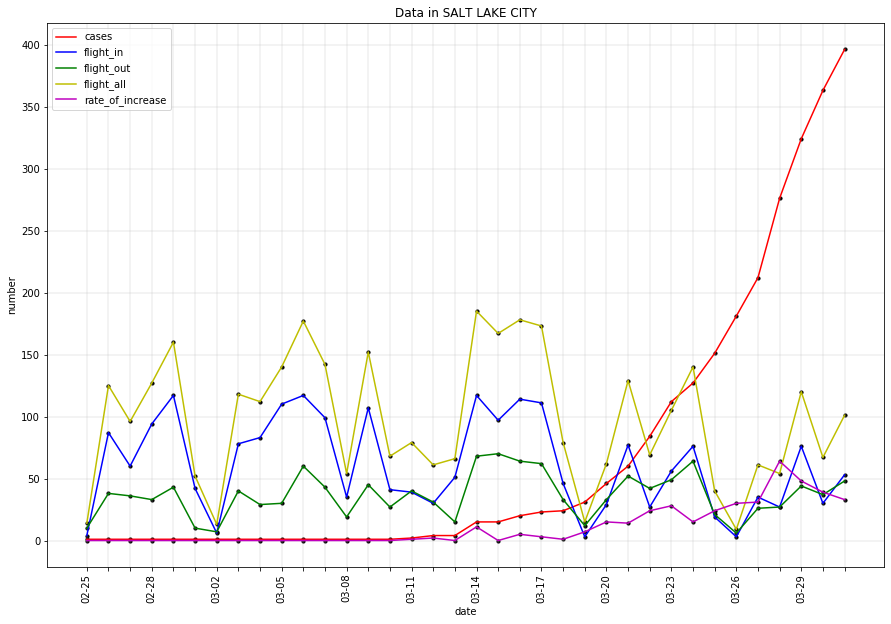

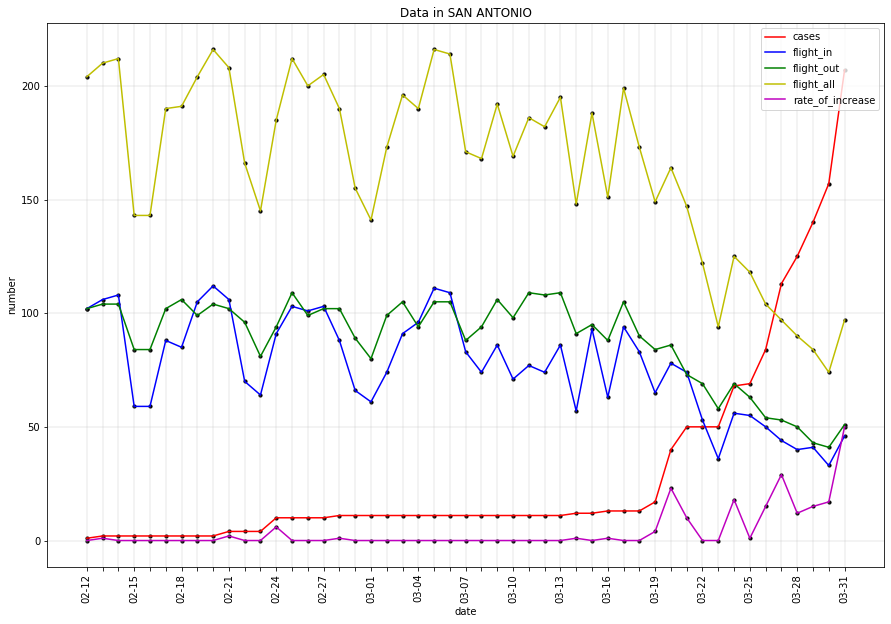

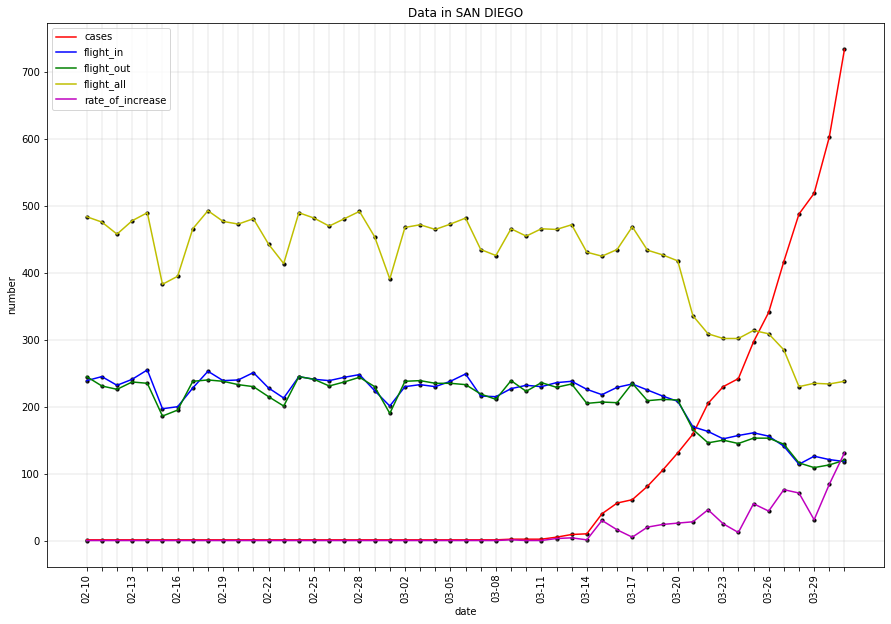

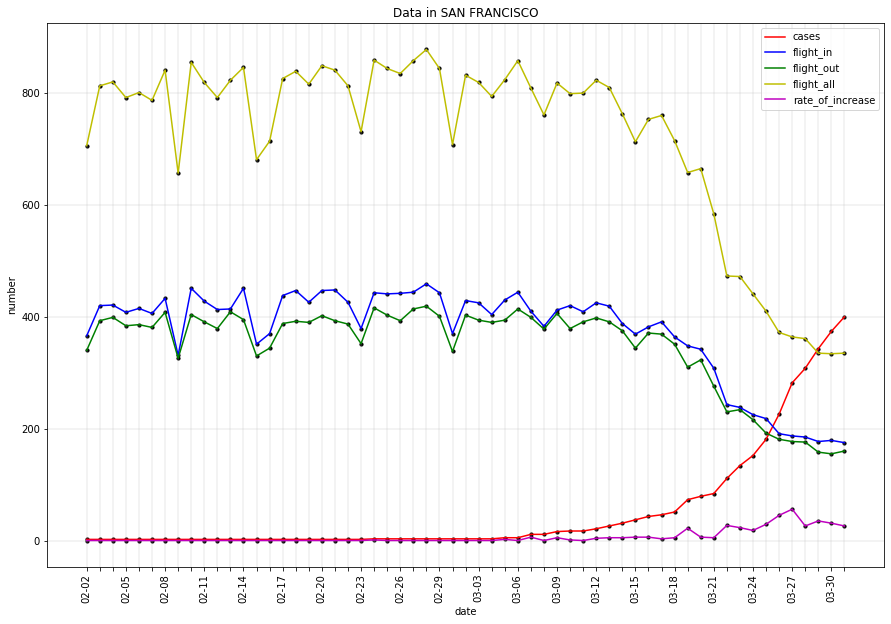

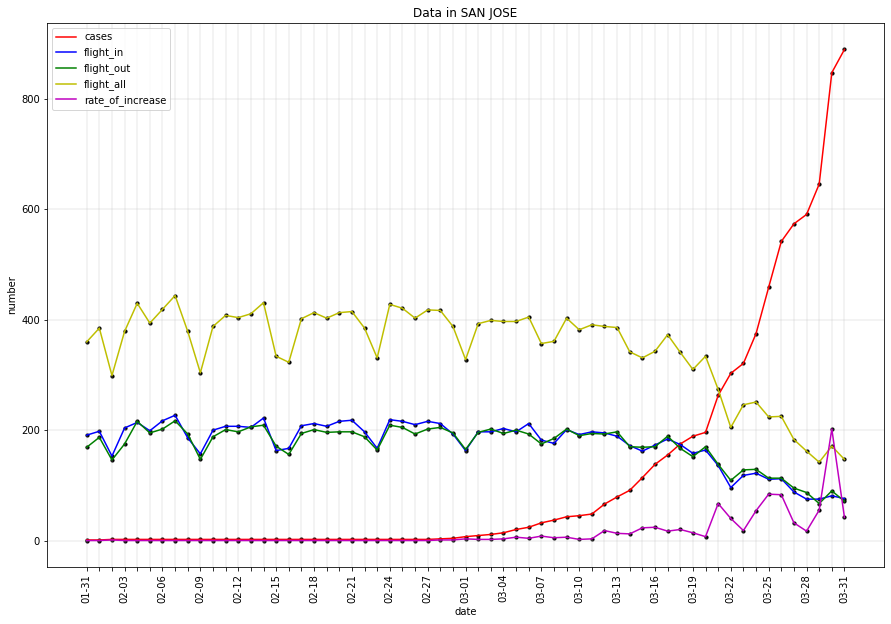

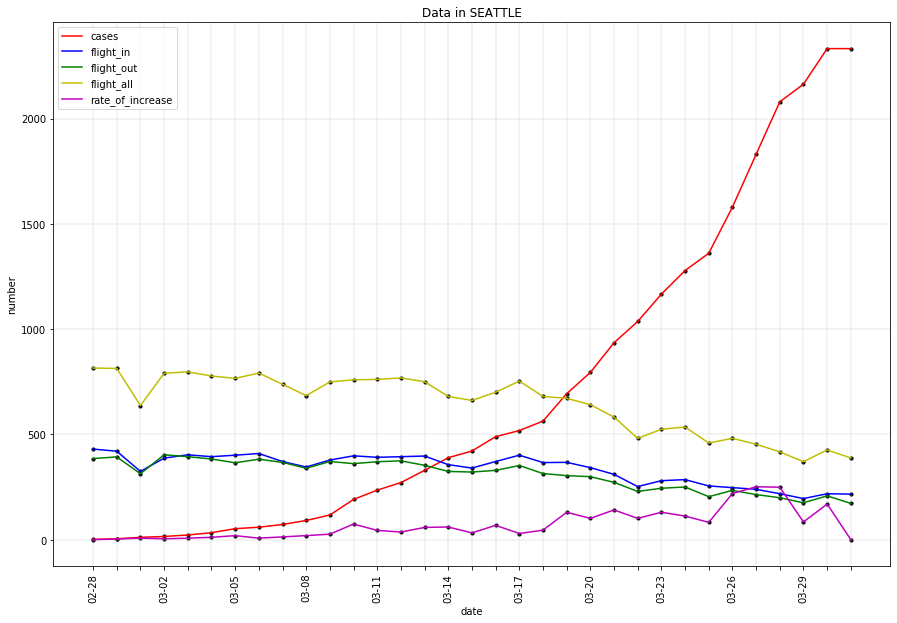

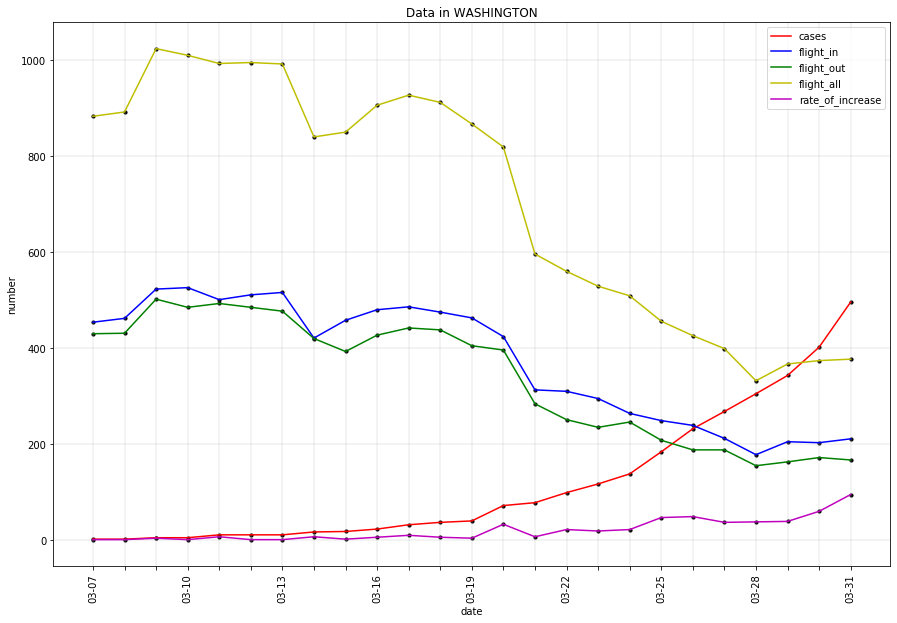

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10 #This makes the figure's width 5 inches, and its height 10 inches.

for city_name in city_list:
    get_covid_and_flight_count_for(city_name)
    plot_covid_and_flight_count_for(city_name)

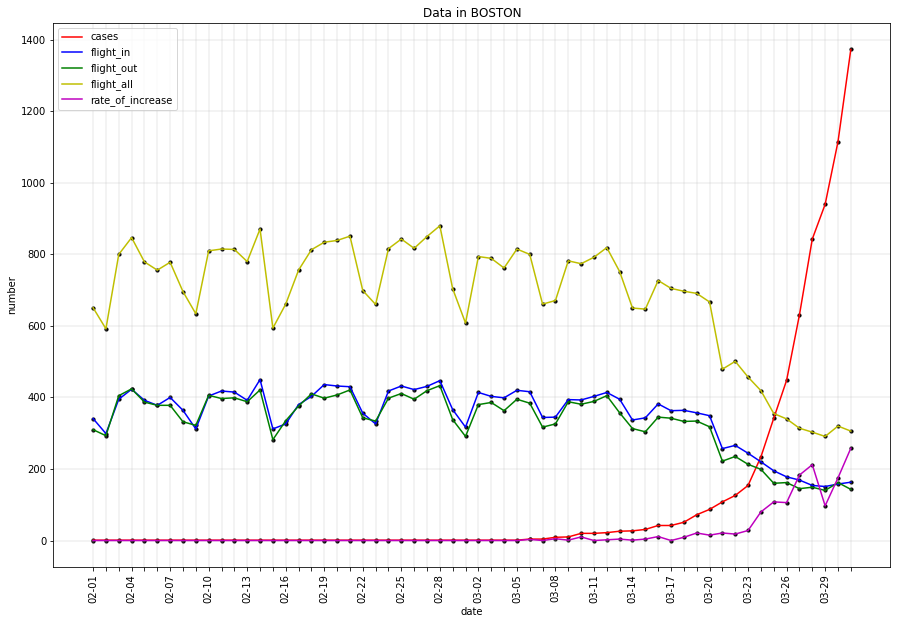

In [9]:
plot_covid_and_flight_count_for('BOSTON')

## Few Obeservations:

1. As the Covid cases increase, the number of flights start going down. 

2. The actual increase in covid for most of the cities starts taking place from 15th to 25th March. To be precise, 17th - 23rd March. Generally, it is during this time period that we observe that the rate of increase graph starts fluctuating.

3. The immediate effect of sudden increase in counts during these dates is that people stop using flights and the first plummet in the flight graph, for most of the cities is seen in the same week.

4. This means that the first 2 weeks of March had a very major role in the spread of the pandemic. This was the time when COVID silently implanted itself in most of the people.

# Analysing Pairwise Covid data 

In [54]:
def merge_dates(dates1, dates2):
    lst = list(set(dates1 + dates2))
    lst.sort()
    return lst

In [55]:
def plot_single_city_on_merged_city_graph(city, color):
    X = [i+1 for i in range(covid_flight_count_data[city]['count'])]
    plt.plot(X, covid_flight_count_data[city]['total_num'], color, label=city + ' cases')

In [56]:
def plot_merged_cities(city1, city2):
    plot_single_city_on_merged_city_graph(city1, 'r')
    plot_single_city_on_merged_city_graph(city2, 'g')
    merged_dates = merge_dates(covid_flight_count_data[city1]['all_dates'], covid_flight_count_data[city2]['all_dates'])
    merged_dates = [m if indx % 4 == 0 else '' for indx, m in enumerate(merged_dates)]
    X = [i + 1 for i in range(len(merged_dates))]
    plt.xticks(X, merged_dates, rotation=90)
    plt.legend()
    plt.show()

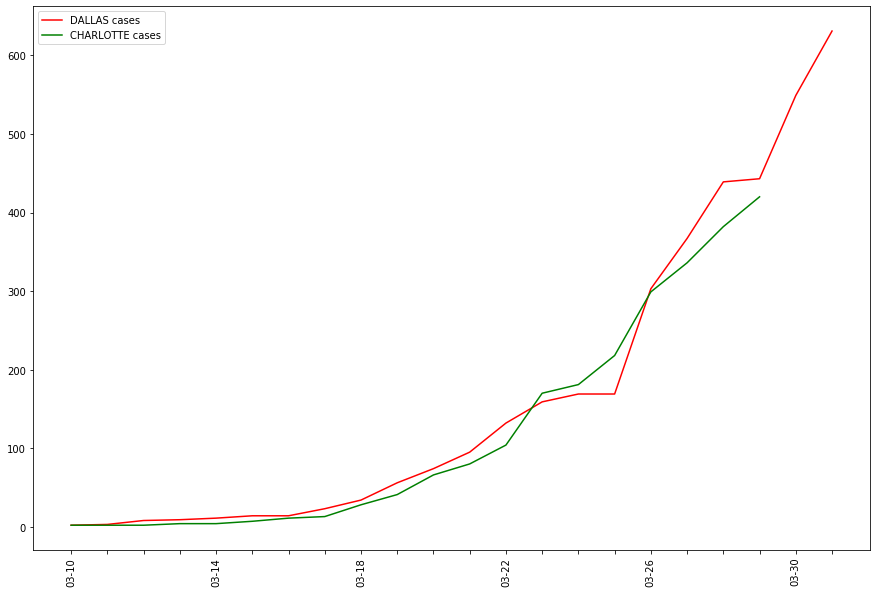

In [60]:
plot_merged_cities('DALLAS', 'CHARLOTTE')